# **EVALUATION OF THE MODELS**

> Evaluating the trained models Bi-LSTM model compressed version and uncompressed version

## **Importing Required Libraries**


In [ ]:
!pip install shap
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install json
!pip install time

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=343251eb6d2411e9ea7928f18bbb8eeeb9b349bdbca6fe0d1c8235bde710a0e1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, log_loss, cohen_kappa_score
import json
from sklearn.metrics import confusion_matrix
import torch
import os
import torch.nn.functional as F
import numpy as np
import tensorflow as tf
import joblib
from keras.models import load_model
import pandas as pd

## **Model Performance Comparison**


*   Comparing the Accuracy, Loss, Precision, Recall, F1 score, Evaluation time of the models




### Importing the datasets

In [ ]:
# Load .JSON file for result comparision
load_path1 = '<path of the uncompressed model file .JSON file>'
load_path2 = '<path of the compressed model .JSON file>'
# load_path1 = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result"
# load_path2 = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result_Compressed"

# Save Path
save_path = '<path of the save confusion matrix>'
# save_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result_Compressed"

# Preprocessed data path
data = np.load('<path of the preprocessed data of LSTM - class 19>')
# data = np.load("/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Preprocessed data/preprocessedrnn_data19.npz", allow_pickle=True)

### Evaluating the saved model

In [ ]:
# Load saved model results
def load_results(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

# Load model results
lstm = load_results(os.path.join(load_path1, 'results_lstm19.json'))
comlstm = load_results(os.path.join(load_path2, 'results_LSTM_Compressed_19.json'))
distilstm = load_results(os.path.join(load_path2, 'results_LSTM_Distilled_19.json'))

def get_metric(results, *possible_keys):
    for key in possible_keys:
        if key in results:
            return results[key]
    return 0.0  # default fallback if none of the keys exist

# Print header
print("\n Model Performance Comparison:\n")
print(f"{'Metric':<20} | {'Bi-LSTM':>15} | {'Com Bi-LSTM':>15} | {'Distilled Bi-LSTM':>20}")
print("-" * 75)

# Print metrics
print(f"{'Accuracy':<20} | {lstm.get('accuracy', 0):>15.4f} | {comlstm.get('accuracy', 0):>15.4f} | {distilstm.get('accuracy', 0):>20.4f}")
print(f"{'Loss':<20} | {lstm.get('loss', 0):>15.4f} | {comlstm.get('loss', 0):>15.4f} | {distilstm.get('loss', 0):>20.4f}")
print(f"{'Precision':<20} | {get_metric(lstm, 'precision', 'precision_weighted'):>15.4f} | {get_metric(comlstm, 'precision', 'precision_weighted'):>15.4f} | {get_metric(distilstm, 'precision', 'precision_weighted'):>20.4f}")
print(f"{'Recall':<20} | {get_metric(lstm, 'recall', 'recall_weighted'):>15.4f} | {get_metric(comlstm, 'recall', 'recall_weighted'):>15.4f} | {get_metric(distilstm, 'recall', 'recall_weighted'):>20.4f}")
print(f"{'F1 Score':<20} | {get_metric(lstm, 'f1_score', 'f1_weighted'):>15.4f} | {get_metric(comlstm, 'f1_score', 'f1_weighted'):>15.4f} | {get_metric(distilstm, 'f1_score', 'f1_weighted'):>20.4f}")




 Model Performance Comparison:

Metric               |         Bi-LSTM |     Com Bi-LSTM |    Distilled Bi-LSTM
---------------------------------------------------------------------------
Accuracy             |          0.9578 |          0.9578 |               0.9578
Loss                 |          0.5746 |          0.5746 |               1.1550
Precision            |          0.9428 |          0.9428 |               0.9306
Recall               |          0.9578 |          0.9578 |               0.9578
F1 Score             |          0.9474 |          0.9474 |               0.9424


### Confusion Matrix

Saved confusion matrix: /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result_Compressed/confusion_matrix_bilstm.png


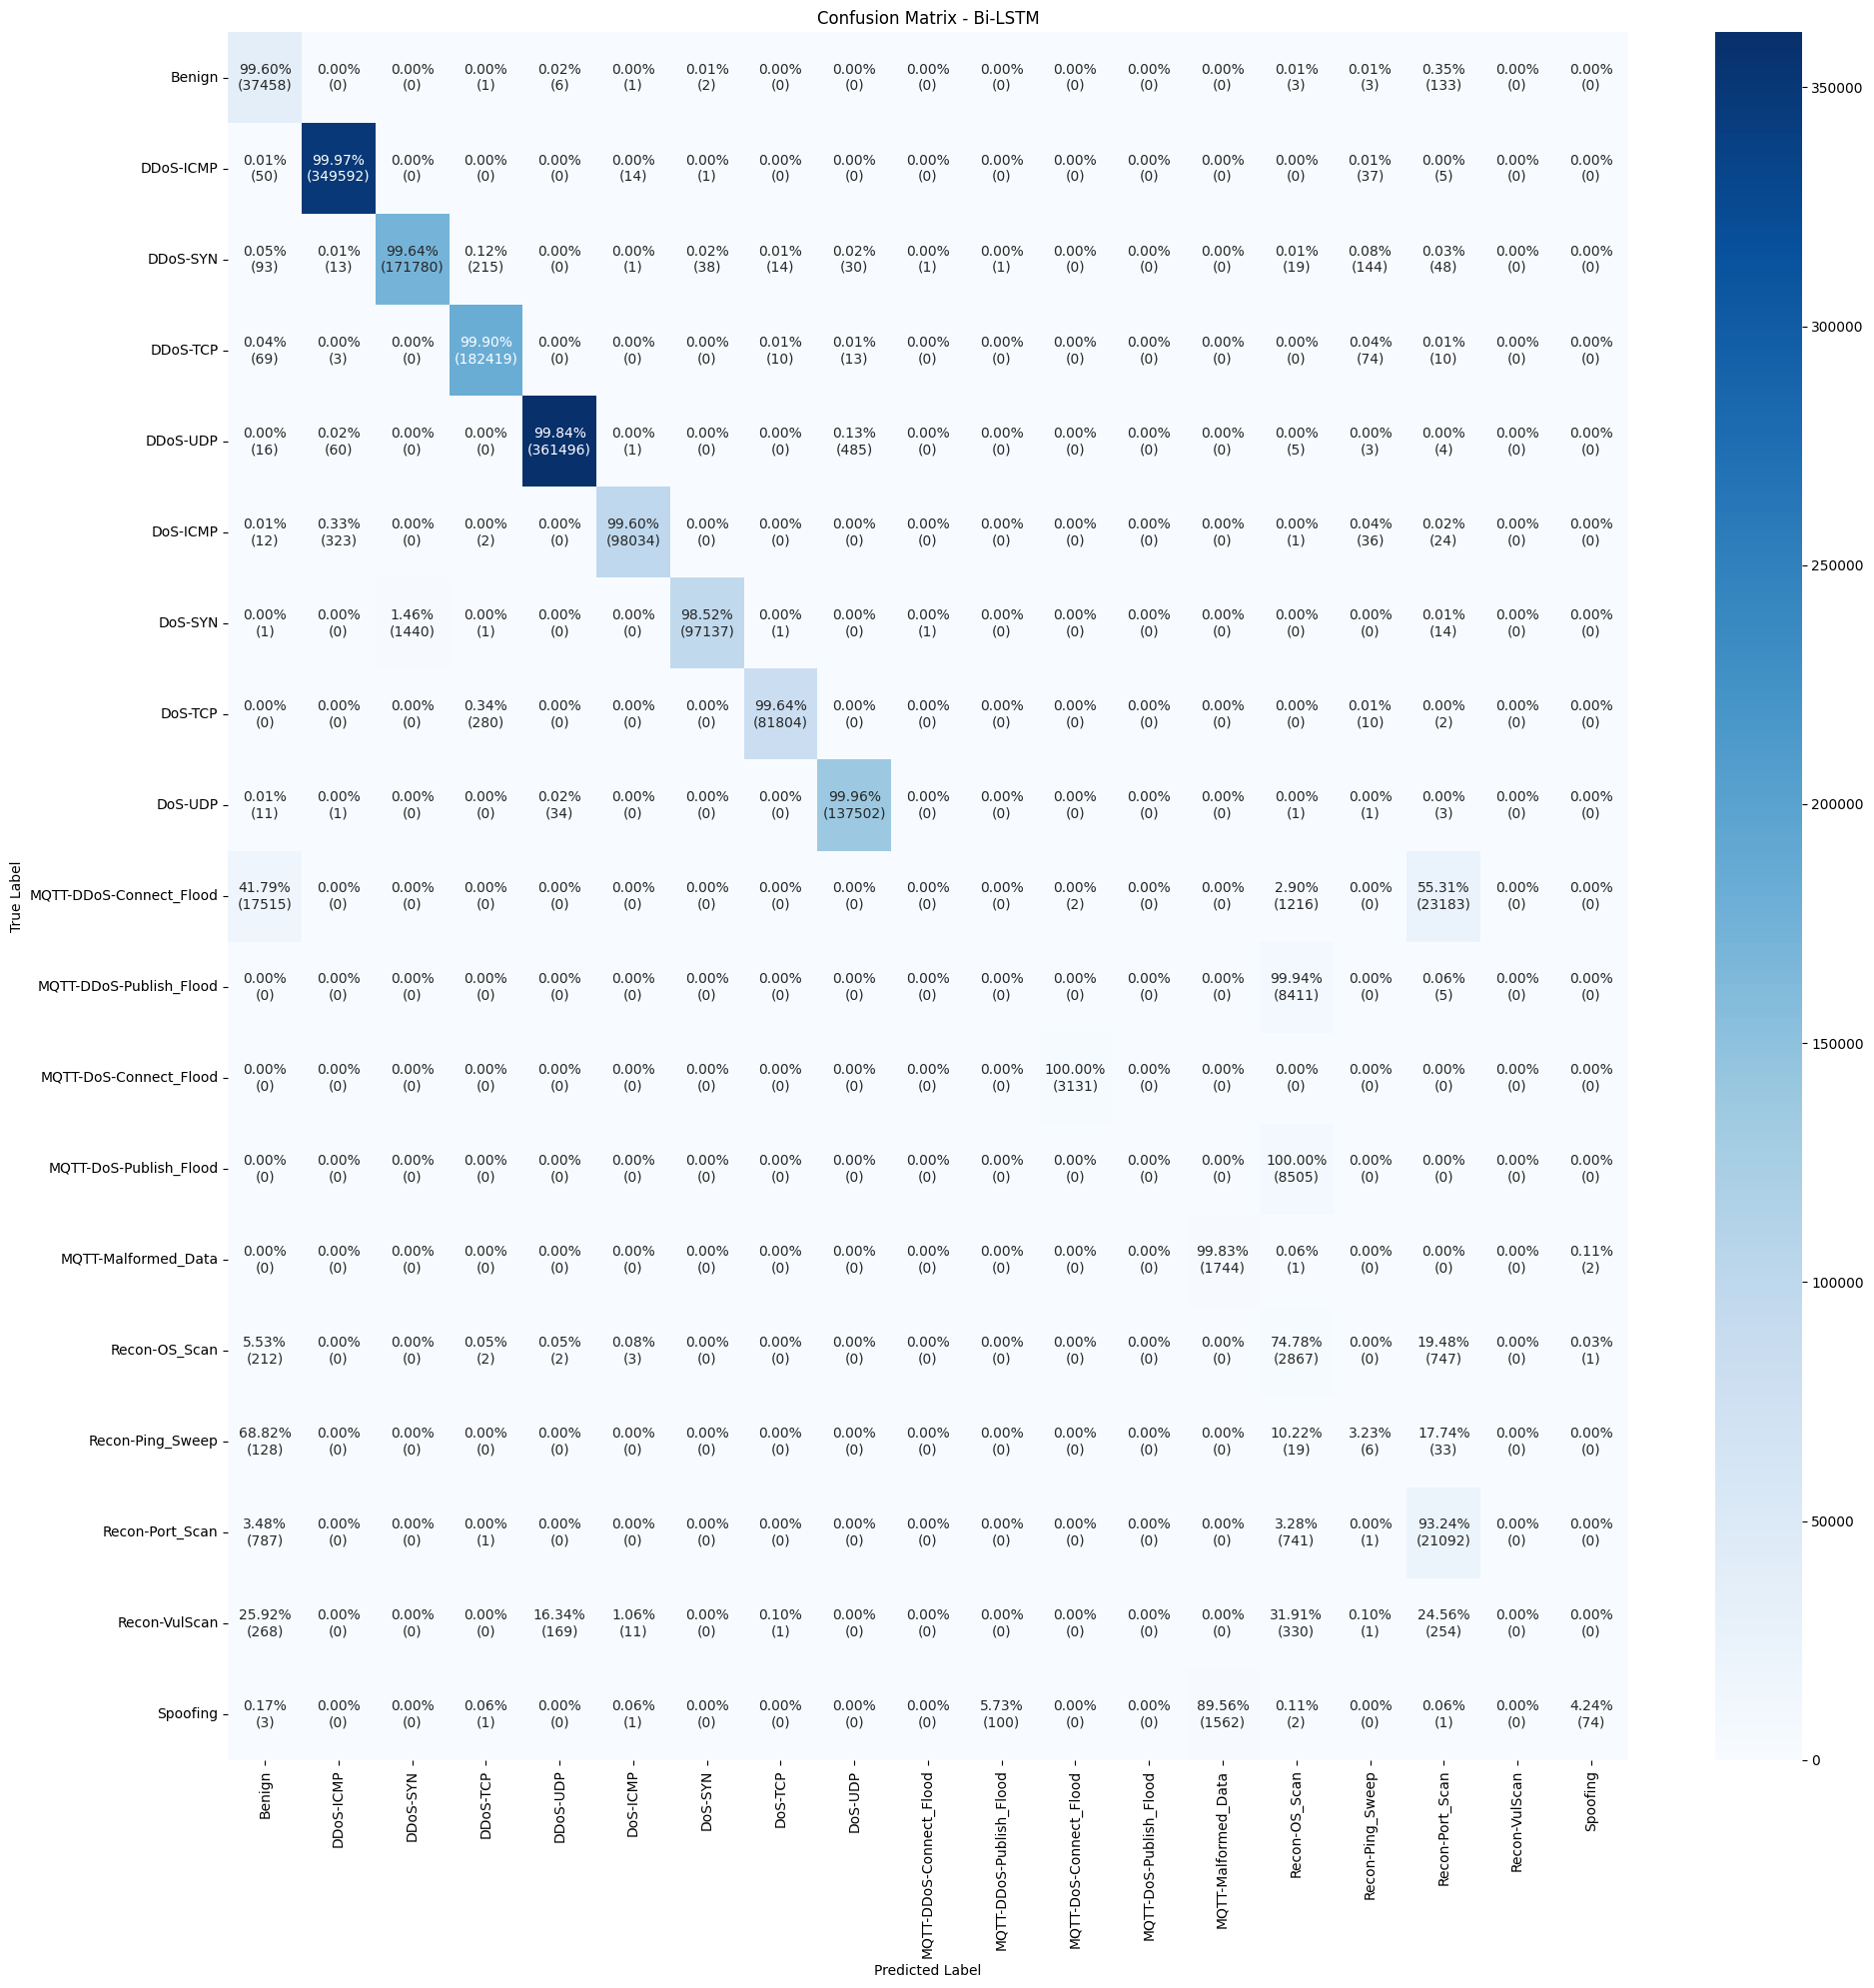

Saved confusion matrix: /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result_Compressed/confusion_matrix_compressed_bilstm.png


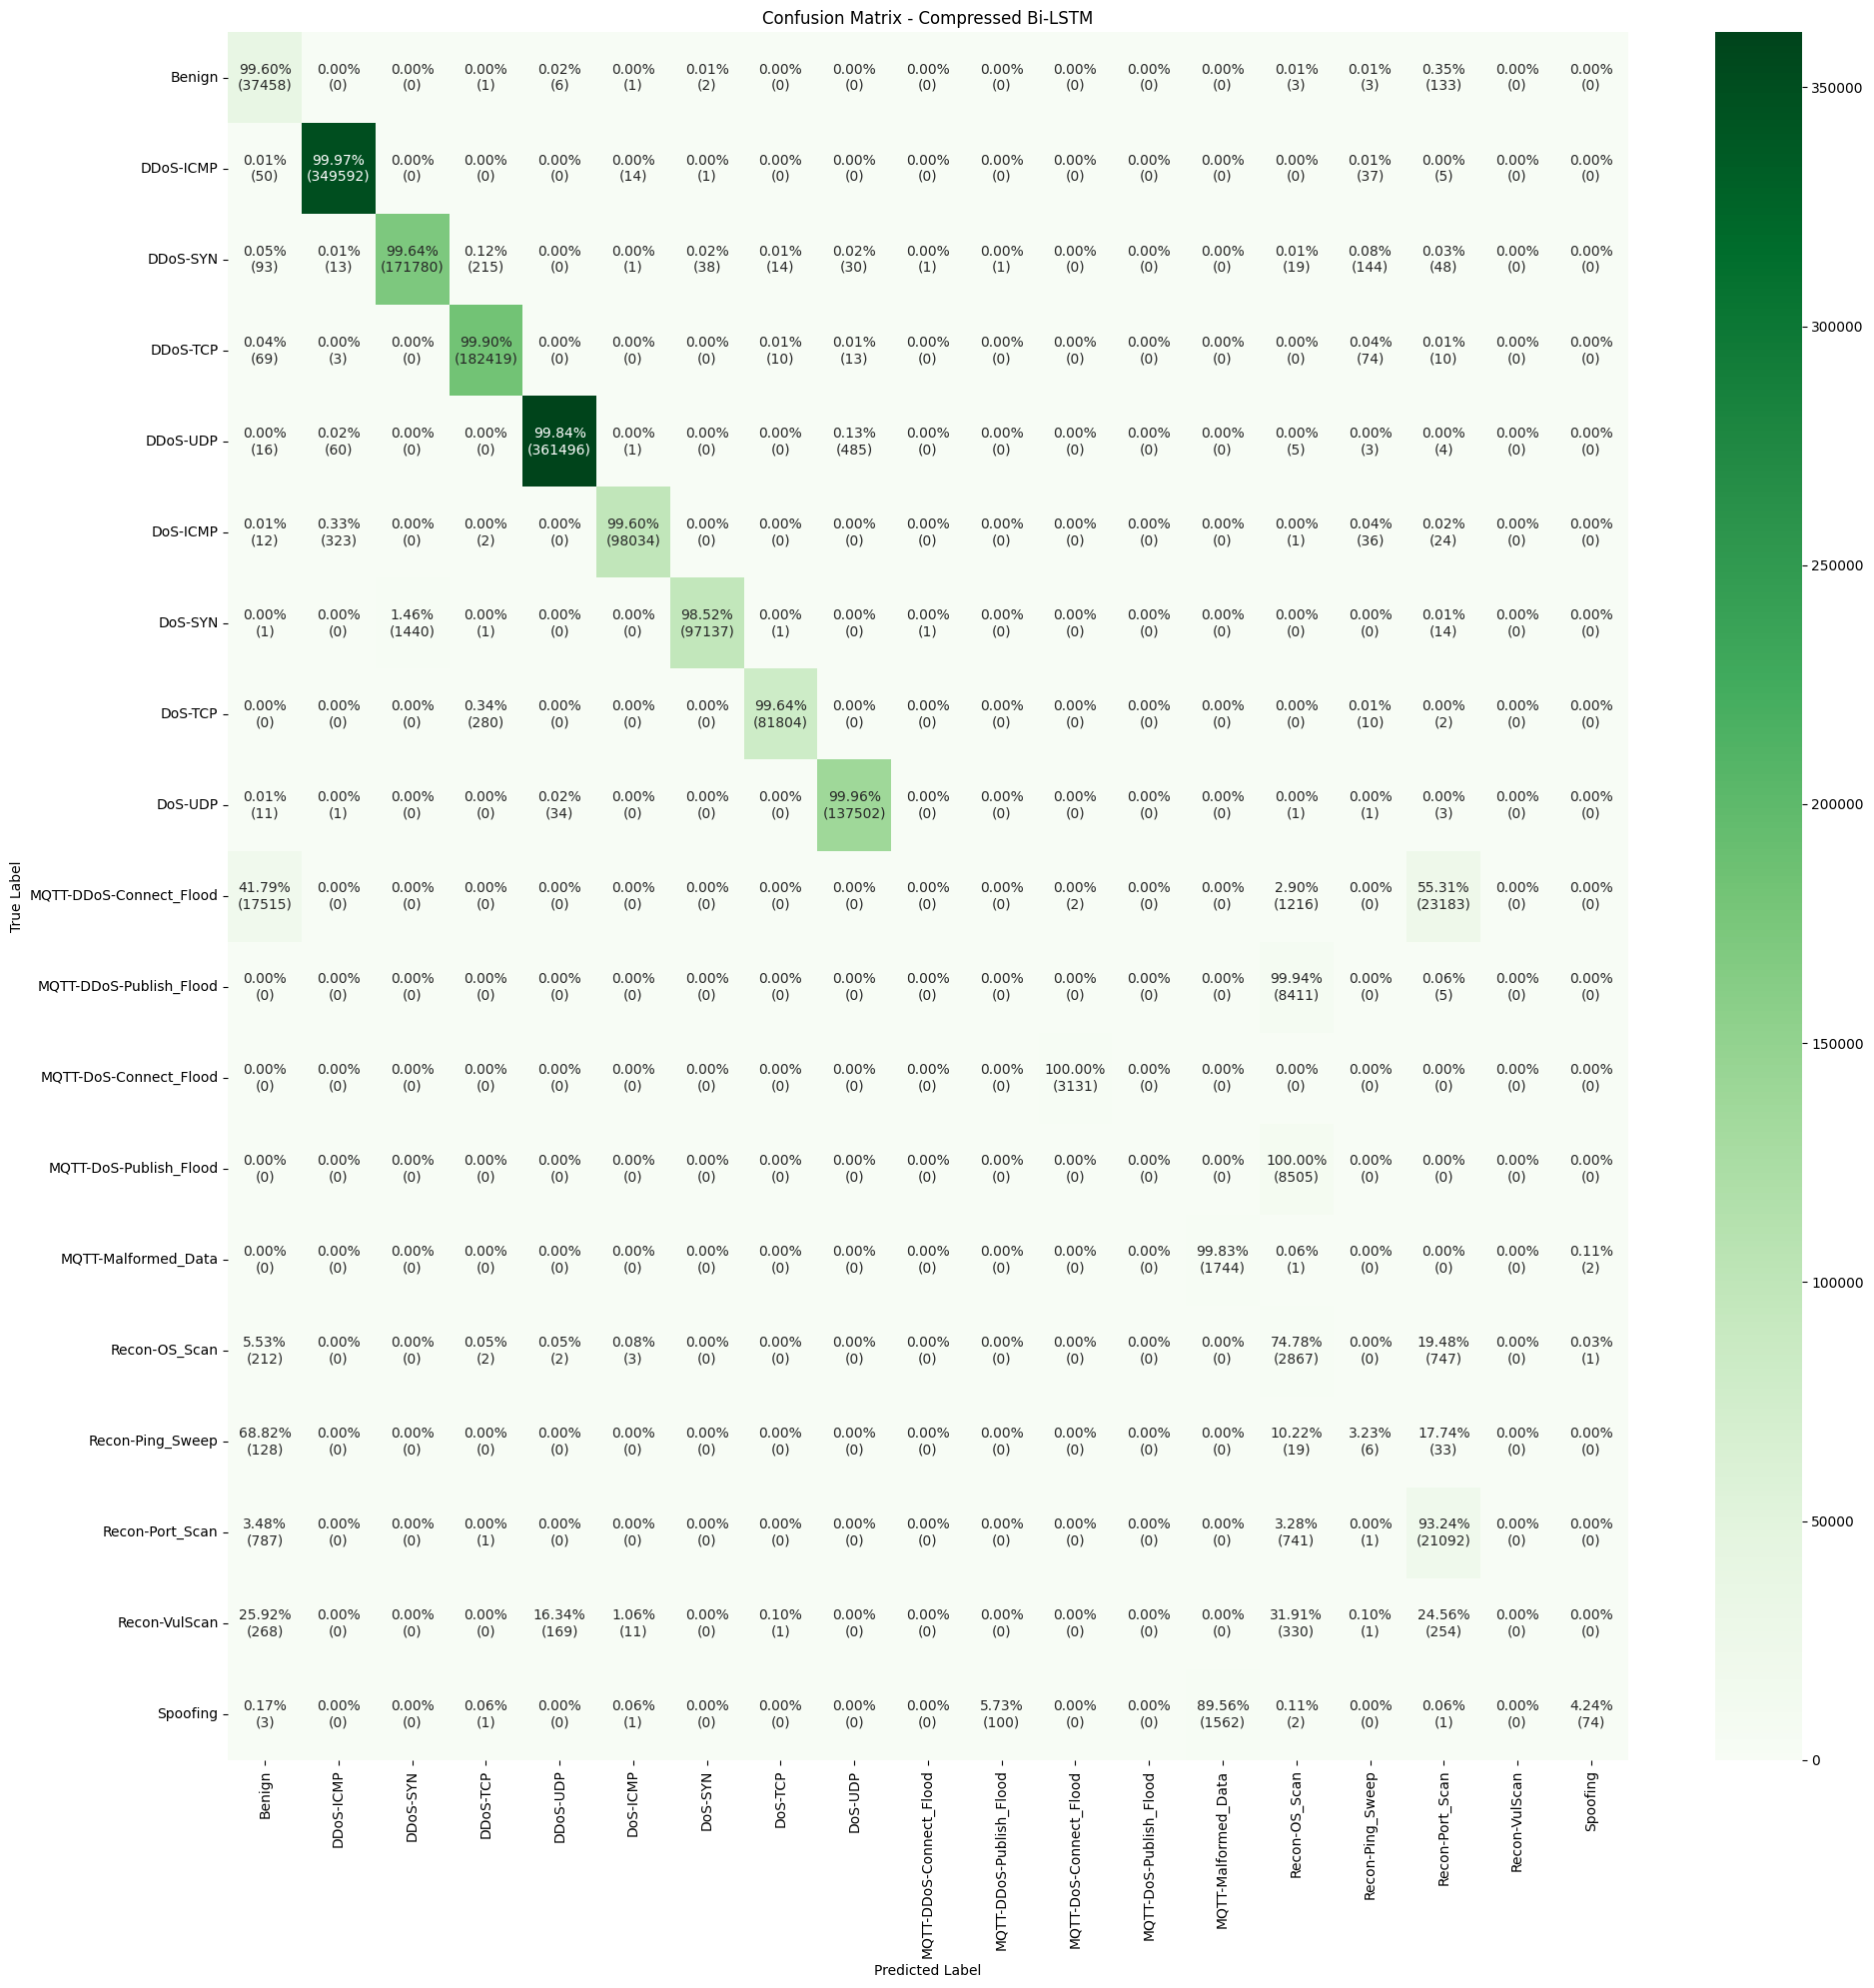

Saved confusion matrix: /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result_Compressed/confusion_matrix_distilled_bilstm.png


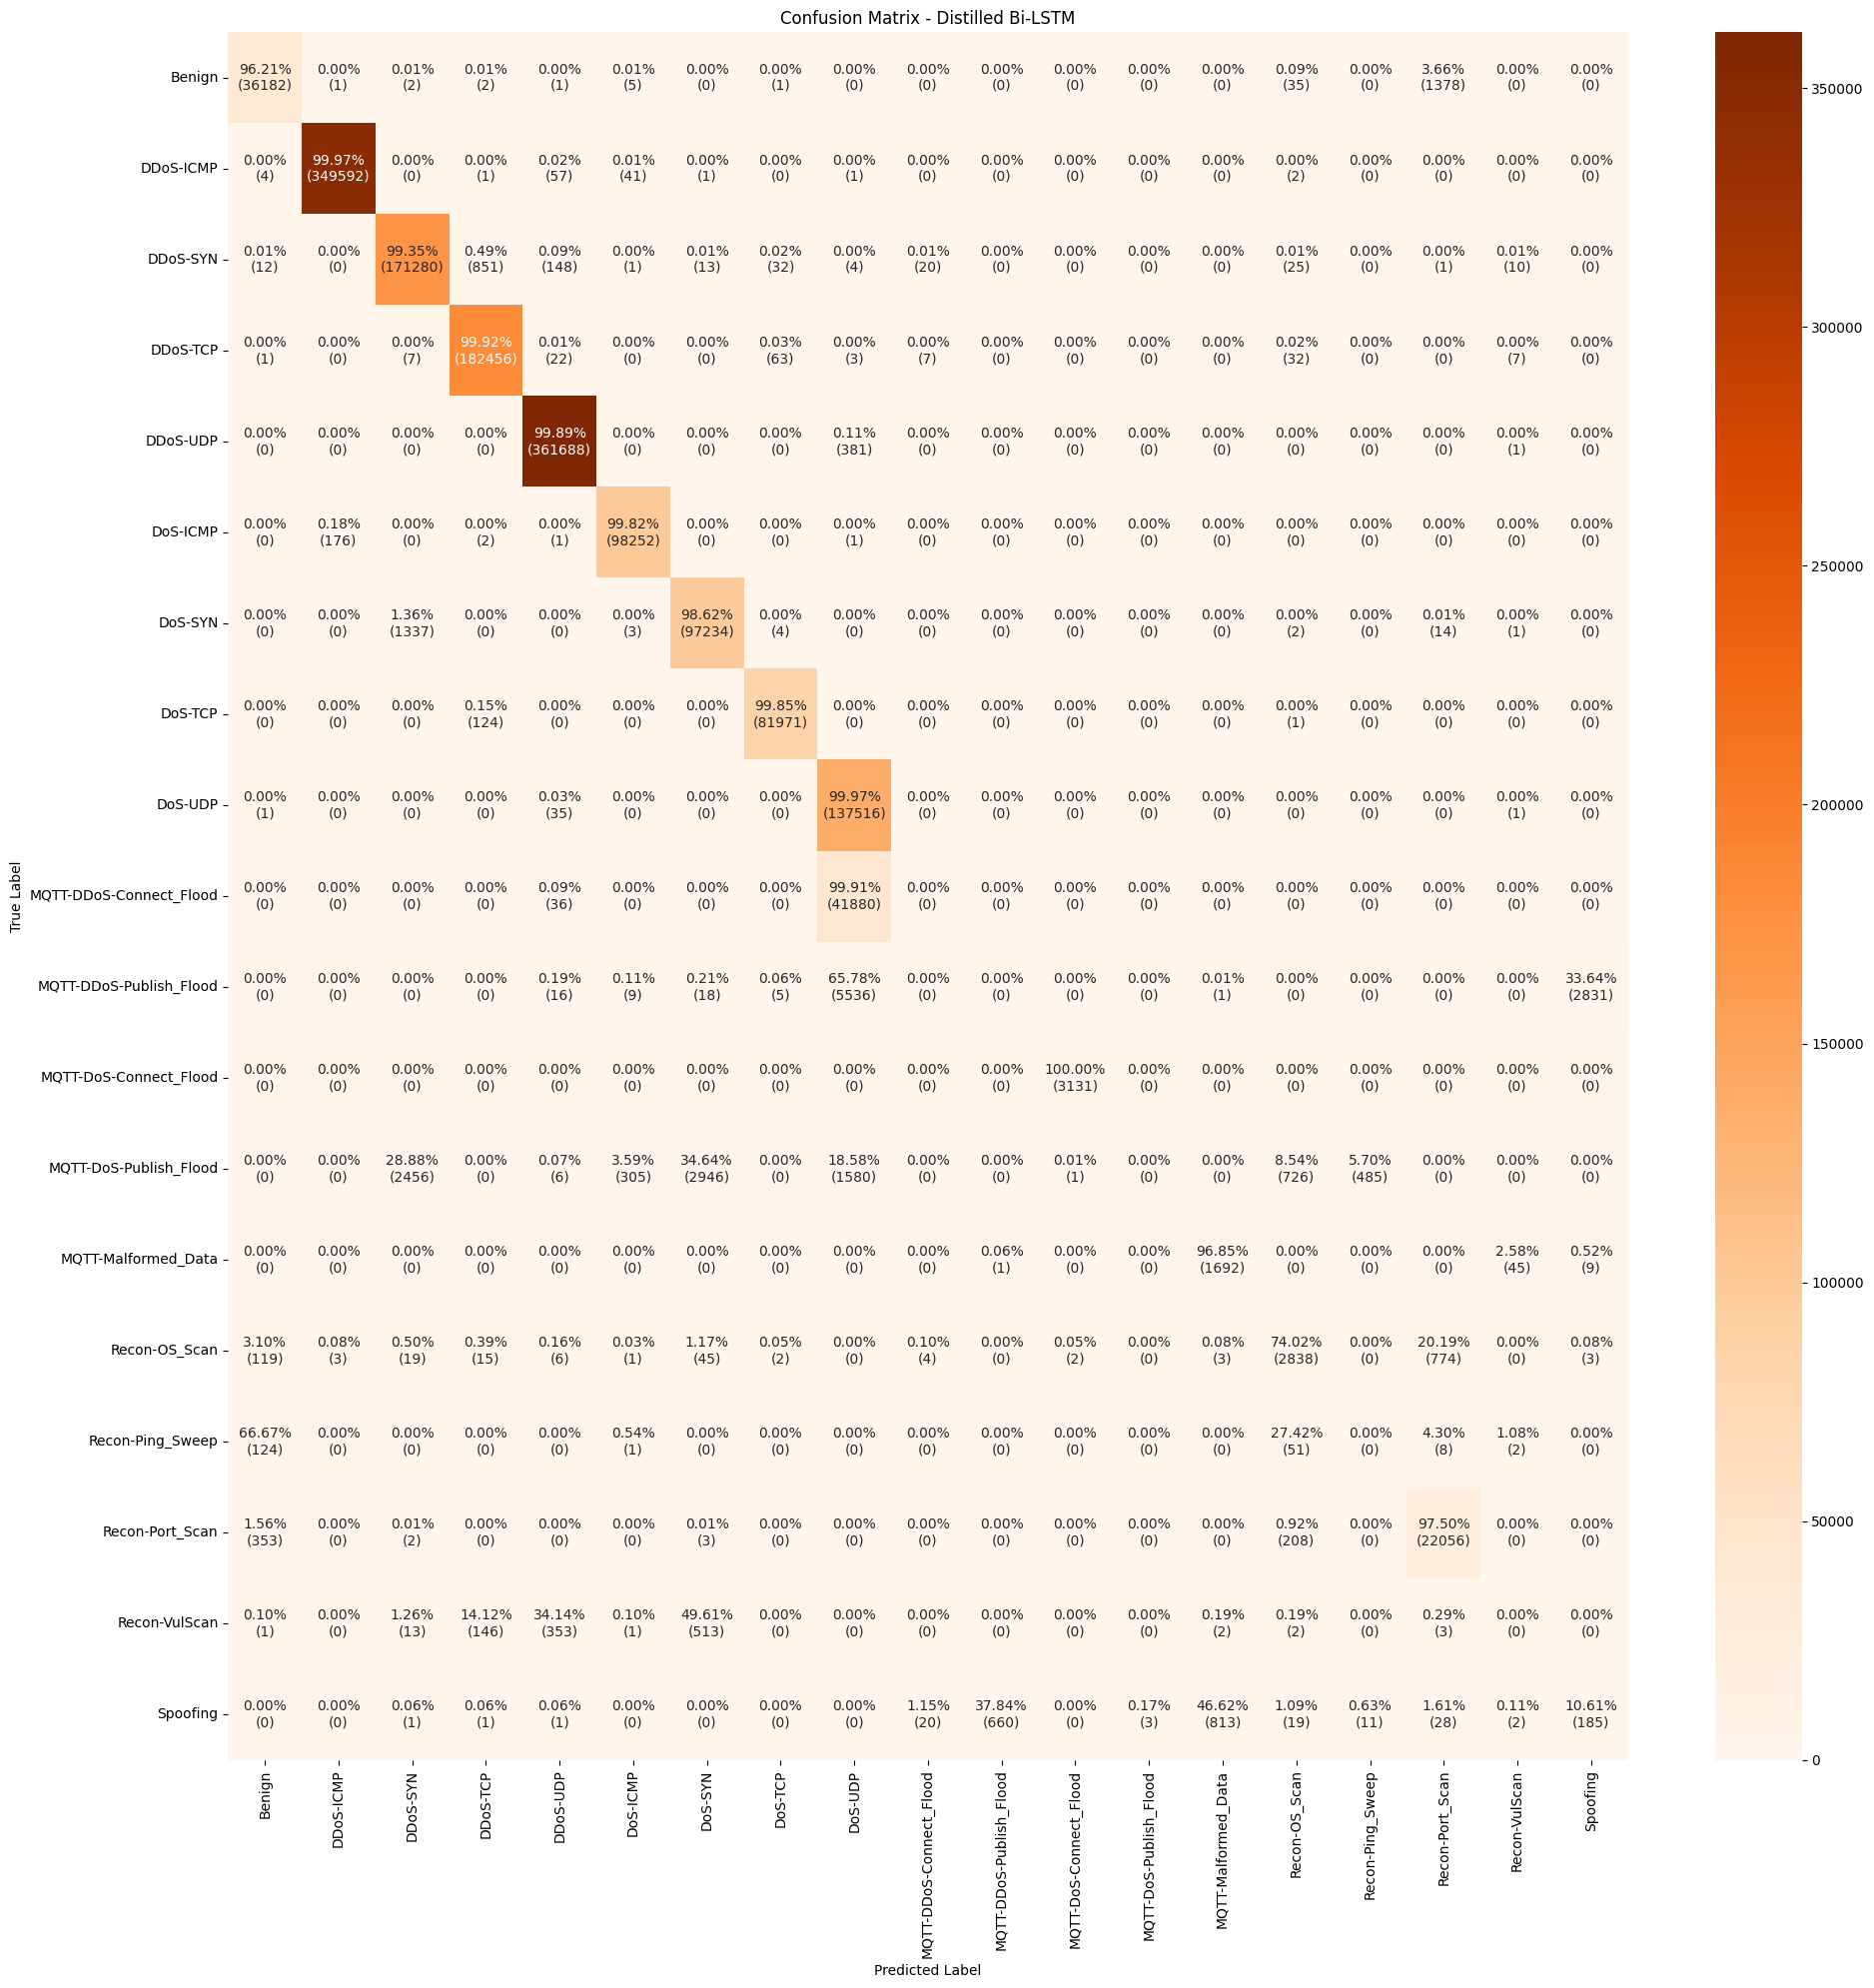

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load label_classes from preprocessing file
label_classes = data["label_classes"]

# Load saved model results
def load_results(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

# Updated confusion matrix plot function with custom color map and save option
def plot_confusion_matrix(y_true, y_pred, model_name, cmap, save_path=None):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    annot = np.empty_like(cm, dtype=object)
    row_sums = cm.sum(axis=1)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            total = row_sums[i]
            percent = cm_normalized[i, j] * 100 if total != 0 else 0
            annot[i, j] = f"{percent:.2f}%\n({count})" if total != 0 else "—"

    plt.figure(figsize=(20, 20))
    sns.heatmap(cm,
                annot=annot,
                fmt='',
                cmap=cmap,
                xticklabels=label_classes,
                yticklabels=label_classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved confusion matrix: {save_path}")

    plt.show()
    plt.close()

# Output directory

# os.makedirs(output_dir, exist_ok=True)

# Plot and save confusion matrices
plot_confusion_matrix(
    lstm["true_labels"], lstm["predicted_labels"],
    "Bi-LSTM", cmap="Blues",
    save_path=os.path.join(save_path, "confusion_matrix_bilstm.png")
)

plot_confusion_matrix(
    comlstm["true_labels"], comlstm["predicted_labels"],
    "Compressed Bi-LSTM", cmap="Greens",
    save_path=os.path.join(save_path, "confusion_matrix_compressed_bilstm.png")
)

plot_confusion_matrix(
    distilstm["true_labels"], distilstm["predicted_labels"],
    "Distilled Bi-LSTM", cmap="Oranges",
    save_path=os.path.join(save_path, "confusion_matrix_distilled_bilstm.png")
)